$$
f(x,y) =
    \begin{cases}
        \dfrac{\sqrt{|xy|}}{\sqrt{x^2+y^2}} & (x,y)\neq (0,0)\\[8pt]
        0 & (x,y)=(0,0)
    \end{cases}
$$

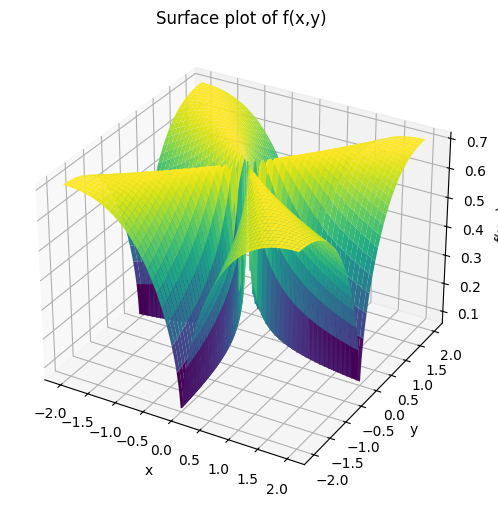

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# f(x, y) の定義
def f(x, y):
    # (0,0) の場合は 0 にする
    denom = np.sqrt(x**2 + y**2)
    result = np.zeros_like(x)
    mask = denom != 0
    result[mask] = np.sqrt(np.abs(x[mask] * y[mask])) / denom[mask]
    return result

# グリッド作成
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3D サーフェスプロット
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Surface plot of f(x,y)")
plt.show()


In [7]:
import numpy as np
import plotly.graph_objects as go

def f(x, y):
    denom = np.sqrt(x**2 + y**2)
    result = np.zeros_like(x)
    mask = denom != 0
    result[mask] = np.sqrt(np.abs(x[mask] * y[mask])) / denom[mask]
    return result

x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3D サーフェス
fig3d = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
fig3d.update_layout(scene=dict(
    xaxis_title='x', yaxis_title='y', zaxis_title='f(x,y)'),
    title="3D Surface Plot (Interactive)",
    paper_bgcolor='black',   # 図全体の背景
    plot_bgcolor='black',    # 座標軸の背景
    font_color='white',       # 軸ラベル・タイトルなどの文字色
    width=700, height=600,
)
fig3d.show()
